## Modèle de régression linéaire multiple

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [110]:
df = pd.read_csv('assurance_dataset_clean.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,True,southwest,16884.92400
1,18,male,33.770,1,False,southeast,1725.55230
2,28,male,33.000,3,False,southeast,4449.46200
3,33,male,22.705,0,False,northwest,21984.47061
4,32,male,28.880,0,False,northwest,3866.85520


## Séparation du df en fonction des critères suivants : homme/fumeur, homme/non-fumeur, femme/fumeur, femme/non-fumeur
## Visualisation des charges en fonction de différents critères

In [111]:
# variable stockant les hommes fumeurs
men_smoker = df[(df['sex'] == 'male') & (df['smoker'] == True)]
men_smoker.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 14 to 1320
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       159 non-null    int64  
 1   sex       159 non-null    object 
 2   bmi       159 non-null    float64
 3   children  159 non-null    int64  
 4   smoker    159 non-null    bool   
 5   region    159 non-null    object 
 6   charges   159 non-null    float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 8.9+ KB


In [112]:
# variable stockant les hommes non-fumeurs
men_no_smoker = df[(df['sex'] == 'male') & (df['smoker'] == False)]
men_no_smoker.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516 entries, 1 to 1332
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       516 non-null    int64  
 1   sex       516 non-null    object 
 2   bmi       516 non-null    float64
 3   children  516 non-null    int64  
 4   smoker    516 non-null    bool   
 5   region    516 non-null    object 
 6   charges   516 non-null    float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 28.7+ KB


In [113]:
# variable stockant les femmes fumeuses
women_smoker = df[(df['sex'] == 'female') & (df['smoker'] == True)]
women_smoker.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       115 non-null    int64  
 1   sex       115 non-null    object 
 2   bmi       115 non-null    float64
 3   children  115 non-null    int64  
 4   smoker    115 non-null    bool   
 5   region    115 non-null    object 
 6   charges   115 non-null    float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 6.4+ KB


In [114]:
# variable stockant les femmes non-fumeuses
women_no_smoker = df[(df['sex'] == 'female') & (df['smoker'] == False)]
women_no_smoker.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 5 to 1335
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       547 non-null    int64  
 1   sex       547 non-null    object 
 2   bmi       547 non-null    float64
 3   children  547 non-null    int64  
 4   smoker    547 non-null    bool   
 5   region    547 non-null    object 
 6   charges   547 non-null    float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 30.4+ KB


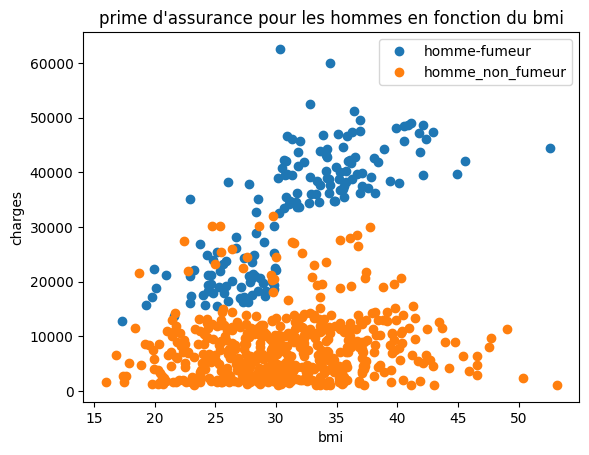

In [115]:
# modélisation de la prime d'assurance pour les hommes en fonction du bmi
plt.plot(men_smoker['bmi'],men_smoker['charges'],"o",label="homme-fumeur")
plt.plot(men_no_smoker['bmi'],men_no_smoker['charges'],"o", label="homme_non_fumeur")
plt.title("prime d'assurance pour les hommes en fonction du bmi")
plt.xlabel('bmi')
plt.ylabel('charges')
plt.legend()
plt.show()

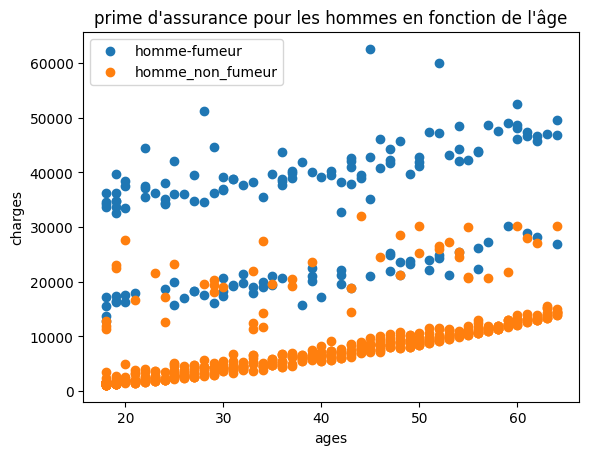

In [116]:
# modélisation de la prime d'assurance pour les hommes en fonction de l'âge
plt.plot(men_smoker['age'],men_smoker['charges'],"o",label="homme-fumeur")
plt.plot(men_no_smoker['age'],men_no_smoker['charges'],"o", label="homme_non_fumeur")
plt.title("prime d'assurance pour les hommes en fonction de l'âge")
plt.xlabel('ages')
plt.ylabel('charges')
plt.legend()
plt.show()

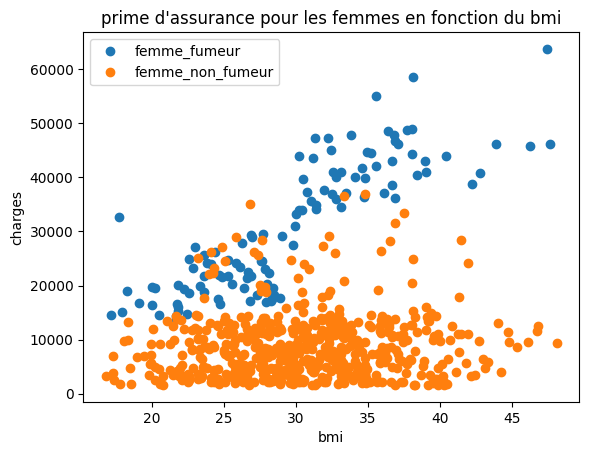

In [117]:
# modélisation de la prime d'assurance pour les femmes en fonction du bmi
plt.plot(women_smoker['bmi'],women_smoker['charges'],"o",label="femme_fumeur")
plt.plot(women_no_smoker['bmi'],women_no_smoker['charges'],"o", label="femme_non_fumeur")
plt.title("prime d'assurance pour les femmes en fonction du bmi")
plt.xlabel('bmi')
plt.ylabel('charges')
plt.legend()
plt.show()

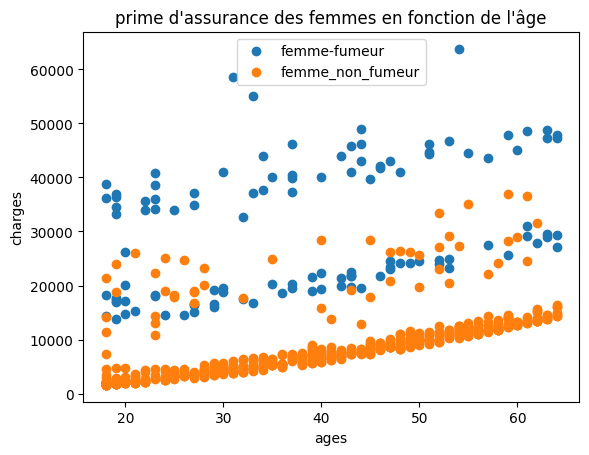

In [118]:
# modélisation de la prime d'assurance pour les femmes en fonction de l'âge
plt.plot(women_smoker['age'],women_smoker['charges'],"o",label="femme-fumeur")
plt.plot(women_no_smoker['age'],women_no_smoker['charges'],"o", label="femme_non_fumeur")
plt.title("prime d'assurance des femmes en fonction de l'âge")
plt.xlabel('ages')
plt.ylabel('charges')
plt.legend()
plt.show()

## Modélisation des prédictions des charges pour les hommes

In [119]:
men_smoker.head(1)

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,True,southeast,39611.7577


In [120]:
# fonction de calcul de la prédiction des charges pour les hommes fumeurs
X = []
W = []
Y = []

def lin_reg(b, X, W):
    for xi,wi in zip(X,W):
        X.append(xi)
        Y.append(wi)
    
        y = y + xi * wi
    y += b
    return y

In [121]:
# stockage des données de calculs dans des variables
MS_AGE = men_smoker['age'].values 
MS_BMI = men_smoker['bmi'].values
MS_CHARGE = men_smoker['charges'].values

In [122]:
print(MS_AGE)
print(MS_BMI)
print(MS_CHARGE)

[27 30 31 22 28 35 60 36 48 36 58 18 28 22 45 59 56 38 20 63 44 34 30 46
 48 18 30 36 35 19 42 19 18 54 50 56 19 52 19 46 40 50 54 25 19 47 31 43
 34 45 52 50 26 24 55 64 61 40 56 42 54 61 24 21 29 51 19 39 42 57 49 48
 30 49 37 18 39 42 43 62 60 39 27 41 35 23 29 27 53 18 33 30 53 27 33 56
 36 41 25 32 57 47 60 18 45 37 25 51 44 34 54 43 51 29 31 30 24 47 43 47
 19 18 22 20 22 49 47 59 37 28 47 38 25 33 60 19 18 31 20 36 52 52 64 32
 24 20 64 24 26 39 61 20 19 45 62 43 42 32 62]
[42.13  35.3   36.3   35.6   36.4   36.67  39.9   35.2   28.    34.43
 36.955 31.68  23.98  37.62  22.895 29.83  19.95  19.3   28.025 35.09
 31.35  25.3   28.69  30.495 24.42  25.175 35.53  41.895 27.74  34.8
 24.64  29.07  17.29  34.21  31.825 33.63  31.92  24.32  36.955 42.35
 19.8   34.2   40.565 45.54  27.7   25.41  34.39  35.97  30.8   36.48
 27.36  32.3   32.9   40.15  30.685 33.88  35.86  32.775 26.695 30.
 25.1   28.31  28.5   25.7   34.4   23.21  30.25  28.3   26.07  42.13
 25.84  40.565 37.8   25.6  

y = b + w * x

In [123]:
X = men_smoker[['age','bmi']].values
type(X)

numpy.ndarray

In [124]:
Y = men_smoker['charges'].values
type(Y)

numpy.ndarray

In [125]:
MF_modele = linear_model.LinearRegression()
MF_modele.fit(X,Y)

LinearRegression()

In [129]:
print("Coefs", MF_modele.coef_)
print("Biais", MF_modele.intercept_)

Coefs [ 303.14536771 1441.60917277]
Biais -24029.603111301345


In [131]:
# prédictions et comparaisons
Y_pred = MF_modele.predict(X)
print(Y[:5])
print(Y_pred[:5])

[39611.7577  36837.467   38711.      35585.576   51194.55914]
[44890.31626593 35953.56171902 37698.3162595  33960.88152915
 36933.04107364]


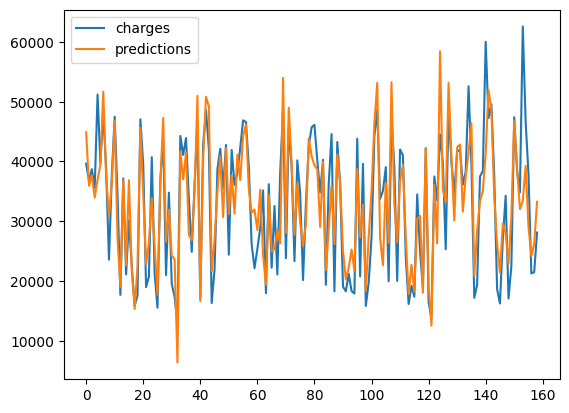

In [132]:
# Visualisation
plt.plot(Y, label='charges')
plt.plot(Y_pred, label='predictions')
plt.legend()
plt.show()